# Simulated Annealing (SA)

1.Initialization:
- Randomly select an initial solution as the current solution
- Set the initial temperature T (usually set to a higher value)
- Set temperature drop rate α (0<α<1)
- Set termination conditions (such as maximum number of iterations, objective function threshold, etc.)

2. Loop until the termination condition is met:
- Randomly select a new solution within the neighborhood of the current solution
- Calculate the objective function difference Δf between the current solution and the new solution
- If Δf<0 (the new solution is better), accept the new solution as the current solution
- Otherwise, accept the new solution as the current solution with probability exp(-Δf/T) (this allows the algorithm to accept poorer solutions with a certain probability, helping to jump out of the local optimum)
- Cooling: T=α*T

3. Output the current solution as the optimal solution

In [8]:
import math
import random

import math
import random

def distance(city1, city2):
    return math.sqrt((city1[0]-city2[0])**2 + (city1[1]-city2[1])**2)

def total_distance(route, cities):
    d = 0
    for i in range(len(route)):
        d += distance(cities[route[i]], cities[route[(i+1)%len(route)]])
    return d

def simulated_annealing(cities,intial_temp, final_temp, alpha):
    # initial solution
    current_solution = list(range(len(cities)))
    random.shuffle(current_solution)
    best_solution = current_solution.copy()

    # Loop
    temp = intial_temp
    count = 0
    # while temp < final_temp:
    while count <= 10000:
        new_solution = current_solution.copy()
        # exchange the order randomly
        i, j = random.sample(range(len(cities)), 2)
        new_solution[i], new_solution[j] = new_solution[j], new_solution[i]

        current_dist = total_distance(current_solution, cities)
        new_dist = total_distance(new_solution, cities)
        delta = new_dist - current_dist
        if delta < 0 or random.random() < math.exp(-delta/temp):
            current_solution = new_solution
            if total_distance(current_solution, cities) < total_distance(best_solution, cities):
                best_solution = current_solution
        temp *= alpha
        count += 1

    return best_solution

cities = [(60, 200), (180, 200), (100, 180), (140, 180), (20, 160), (100, 160), (200, 160), (140, 140), (40, 120), (80, 120), (180, 100), (60, 80), (120, 80), (180, 60), (20, 40), (100, 40), (200, 40), (20, 20), (60, 20), (160, 20)]
initial_temp = 10000
final_temp = 1e-8
alpha = 0.99

best_route = simulated_annealing(cities, initial_temp, final_temp, alpha)
print(best_route)

[3, 2, 5, 9, 8, 11, 15, 12, 7, 0, 4, 14, 17, 18, 19, 16, 13, 10, 6, 1]


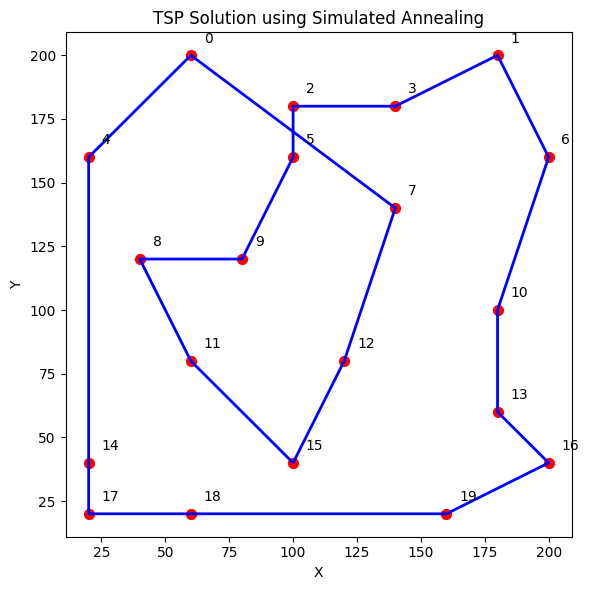

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
x = [city[0] for city in cities]
y = [city[1] for city in cities]
plt.scatter(x, y, color='red', s=50)

for i in range(len(cities)):
    plt.annotate(i, (x[i]+5, y[i]+5))

best_route_coords = [cities[i] for i in best_route]
best_route_coords.append(best_route_coords[0])
x_route = [coord[0] for coord in best_route_coords]
y_route = [coord[1] for coord in best_route_coords]
plt.plot(x_route, y_route, linewidth=2, color='blue')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('TSP Solution using Simulated Annealing')
plt.tight_layout()
plt.show()

# LNS
- Initialization: Generate an initial feasible solution.
- Destruction: Select some elements from the current solution and remove them from the solution.
- Fix: Use some heuristic to reinsert the removed elements to generate a new feasible solution.
- Accept: Decide whether to accept the new solution as the current solution according to the acceptance criterion.
- Repeat: Repeat steps 2 to 4 until the stopping conditions are met (such as reaching the maximum number of iterations, finding a satisfactory solution, etc.).

In [10]:
import random
import copy

def total_distance(route, dist_matrix):
    d = 0
    for i in range(len(route)):
        d += dist_matrix[route[i]][route[(i+1)%len(route)]]
    return d

def lns(dist_matrix, max_iter, destroy_ratio):
    n = len(dist_matrix)
    current_solution = list(range(n))
    random.shuffle(current_solution)
    best_solution = copy.deepcopy(current_solution)
    
    for _ in range(max_iter):
        destroy_size = int(n * destroy_ratio)
        destroyed_indices = random.sample(range(n), destroy_size)
        destroyed_cities = [current_solution[i] for i in destroyed_indices]
        
        for city in destroyed_cities:
            current_solution.remove(city)
        
        for city in destroyed_cities:
            best_pos = -1
            best_dist = float('inf')
            for i in range(len(current_solution)+1):
                new_solution = current_solution[:i] + [city] + current_solution[i:]
                new_dist = total_distance(new_solution, dist_matrix)
                if new_dist < best_dist:
                    best_pos = i
                    best_dist = new_dist
            current_solution.insert(best_pos, city)
        
        if total_distance(current_solution, dist_matrix) < total_distance(best_solution, dist_matrix):
            best_solution = copy.deepcopy(current_solution)
    
    return best_solution

dist_matrix = [
    [0, 2, 9, 10],
    [1, 0, 6, 4],
    [15, 7, 0, 8],
    [6, 3, 12, 0]
]

max_iter = 1000
destroy_ratio = 0.2

best_route = lns(dist_matrix, max_iter, destroy_ratio)
print(best_route)

[2, 1, 0, 3]


# Tabu search
- Initialization: Generate an initial feasible solution and set it as the current solution and optimal solution.
- Generate neighborhood solutions: Generate a set of candidate solutions within the neighborhood of the current solution.
- Select the optimal neighborhood solution: Among the candidate solutions, select a non-taboo solution with the optimal objective function value as the new current solution.
- Update optimal solution: If the new current solution is better than the current optimal solution, set it as the new optimal solution.
- Update the tabu list: Add certain attributes of the new current solution (such as an edge or exchange operation) to the tabu list, and update the tabu list.
- Repeat: Repeat steps 2 to 5 until the stopping conditions are met (such as reaching the maximum number of iterations, finding a satisfactory solution, etc.).

In [11]:
import random
import copy

def total_distance(route, dist_matrix):
    d = 0
    for i in range(len(route)):
        d += dist_matrix[route[i]][route[(i+1)%len(route)]]
    return d

def lns(dist_matrix, max_iter, destroy_ratio):
    n = len(dist_matrix)
    current_solution = list(range(n))
    random.shuffle(current_solution)
    best_solution = copy.deepcopy(current_solution)
    
    for _ in range(max_iter):
        destroy_size = int(n * destroy_ratio)
        destroyed_indices = random.sample(range(n), destroy_size)
        destroyed_cities = [current_solution[i] for i in destroyed_indices]
        
        for city in destroyed_cities:
            current_solution.remove(city)
        
        for city in destroyed_cities:
            best_pos = -1
            best_dist = float('inf')
            for i in range(len(current_solution)+1):
                new_solution = current_solution[:i] + [city] + current_solution[i:]
                new_dist = total_distance(new_solution, dist_matrix)
                if new_dist < best_dist:
                    best_pos = i
                    best_dist = new_dist
            current_solution.insert(best_pos, city)
        
        if total_distance(current_solution, dist_matrix) < total_distance(best_solution, dist_matrix):
            best_solution = copy.deepcopy(current_solution)
    
    return best_solution

dist_matrix = [
    [0, 2, 9, 10],
    [1, 0, 6, 4],
    [15, 7, 0, 8],
    [6, 3, 12, 0]
]

max_iter = 1000
destroy_ratio = 0.2

best_route = lns(dist_matrix, max_iter, destroy_ratio)
print(best_route)

[3, 1, 0, 2]


# 2-opt

Suppose we have a TSP path represented as a sequence of nodes (0, 1, 2, ..., n-1), where n is the number of cities. The steps for 2-opt operation are as follows:

Select two non-adjacent nodes i and j in the path (0 ≤ i < j < n).
Reverse the path segment between nodes i and j (i.e. subpath (i, i+1, ..., j)).
Evaluate the objective function value of the new path (such as the total distance), and if the new path is better, accept this transformation.

In [12]:
def two_opt_swap(route, i, j):
    return route[:i] + route[i:j+1][::-1] + route[j+1:]

# Ant Colony Optimization
- Initialization: Set the algorithm parameters (such as the number of ants, pheromone influence factors, etc.), and initialize the pheromone matrix.
- Construct a solution: For each ant, start from a random city and select the next city in sequence according to the state transition rules until all cities are visited.
- Update pheromone: Update the pheromone matrix based on the solution quality of each ant. Generally, higher quality explanations release more pheromones.
- Evaporation of pheromones: In order to avoid premature convergence of the algorithm, the evaporation operation needs to be performed on the pheromone matrix, that is, the pheromones on all edges are reduced at a certain rate.
- Repeat: Repeat steps 2 to 4 until the stopping conditions are met (such as reaching the maximum number of iterations, finding a satisfactory solution, etc.).

In [ ]:
import random
import numpy as np

class AntColony:
    def __init__(self, dist_matrix, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        self.dist_matrix = dist_matrix
        self.pheromone = np.ones(self.dist_matrix.shape) / len(dist_matrix)
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta

    def run(self):
        best_path = None
        best_dist = float("inf")
        for _ in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.spread_pheromone(all_paths)
            best_path_iteration, best_dist_iteration = min(all_paths, key=lambda x: x[1])
            if best_dist_iteration < best_dist:
                best_path = best_path_iteration
                best_dist = best_dist_iteration
        return best_path, best_dist

    def spread_pheromone(self, all_paths):
        sorted_paths = sorted(all_paths, key=lambda x: x[1])
        for path, dist in sorted_paths[:self.n_best]:
            for move in path:
                self.pheromone[move] += 1.0 / self.dist_matrix[move]

    def gen_path(self):
        path = []
        visited = set()
        city = random.randint(0, len(self.dist_matrix) - 1)
        visited.add(city)
        path.append(city)
        while len(visited) < len(self.dist_matrix):
            next_city = self.pick_move(city, visited)
            path.append(next_city)
            visited.add(next_city)
            city = next_city
        path.append(path[0])  # 回到起点
        dist = self.get_distance(path)
        return path, dist

    def pick_move(self, city, visited):
        pheromone_neighbors = self.pheromone[city, :] ** self.alpha * (1.0 / self.dist_matrix[city, :]) ** self.beta
        pheromone_neighbors[list(visited)] = 0
        pheromone_probabilities = pheromone_neighbors / pheromone_neighbors.sum()
        next_city = np.random.choice(range(len(self.dist_matrix)), p=pheromone_probabilities)
        return next_city

    def gen_all_paths(self):
        all_paths = []
        for _ in range(self.n_ants):
            path, dist = self.gen_path()
            all_paths.append((path, dist))
        return all_paths

    def get_distance(self, path):
        dist = 0
        for i in range(len(path) - 1):
            city_from = path[i]
            city_to = path[i+1]
            dist += self.dist_matrix[city_from, city_to]
        return dist

dist_matrix = np.array([[0, 2, 9, 10],
                        [1, 0, 6, 4],
                        [15, 7, 0, 8],
                        [6, 3, 12, 0]])

ant_colony = AntColony(dist_matrix, 10, 5, 100, 0.95, alpha=1, beta=2)
best_path, best_dist = ant_colony.run()
print(f"Best path: {best_path}, Best distance: {best_dist}")